# Programming in Python
## Exam: January 17, 2022


You can solve the exercises below by using standard Python 3.9 libraries, NumPy, Matplotlib, Pandas, PyMC3.
You can browse the documentation: [Python](https://docs.python.org/3.9/), [NumPy](https://numpy.org/doc/stable/user/index.html), [Matplotlib](https://matplotlib.org/3.3.1/contents.html), [Pandas](https://pandas.pydata.org/pandas-docs/version/1.2.5/), [PyMC3](https://docs.pymc.io/).
You can also look at the [slides of the course](https://homes.di.unimi.it/monga/lucidi2021/pyqb00.pdf) or your code on [GitHub](https://github.com).

**It is forbidden to communicate with others.** 


In [1]:
%matplotlib inline
import numpy as np   # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pymc3 as pm   # type: ignore

### Exercise 1 (max 3 points)

The file [birds_romania.csv](birds_romania.csv) contains data about birds recording collected in Romania (source: https://xeno-canto.org). Read them in a `DataFrame`, be sure the columns with latitude (`lat`), longitude (`lng`), and altitude (`alt`) are called `latitude`, `longitude`, and `altitude`. 

In [2]:
birds = pd.read_csv('birds_romania.csv')

birds = birds.rename(columns={'lat': 'latitude', 'alt': 'altitude','lng': 'longitude'})
##cambiare specifici nomi alle colonne


In [3]:
##metodo prof irds = pd.read_csv('birds_romania.csv')

##names = {'lat': 'latitude', 'lng': 'longitude', 'alt': 'altitude'}

##birds.columns = [names[c] if c in names else c for c in birds.columns]

##birds.head()

### Exercise 2 (max 3 points)


Plot a histogram of altitudes: draw a bar for each 100m interval.

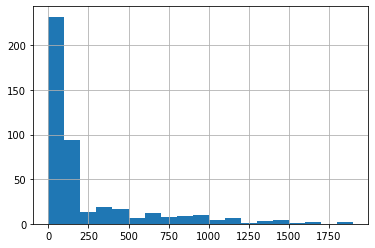

In [4]:
bins= (birds['altitude'].max()-birds['altitude'].min())//100
ax = birds['altitude'].hist(bins=bins)

### Exercise 3 (max 6 points)

In order to compute the distance between two points on Earth, given in terms of latitude and longitude, one can use the easier formula valid for spheres. If $R$ is the radius, $\phi$ is the latitude, $\lambda$ the longitude, and $\Delta$ denotes the difference between the coordinates of the two points: 

\begin{align}
  d &= 2\cdot R\cdot\arcsin \sqrt{\sin^2\left(\frac{\Delta\phi}{2}\right) + \left(1 - \sin^2\left(\frac{\Delta\phi}{2}\right) - \sin^2\left(\frac{\phi_1 + \phi_2}{2}\right)\right)\cdot\sin^2\left(\frac{\Delta\lambda}{2}\right)}.
\end{align}

By default use the mean Earth's radius of 6371.009km. For example, The distance between $(45.1^\circ, 9.2^\circ)$ (near Pavia) and $(45.3^\circ, 9.4^\circ)$ (near Lodi) should be approximately 27.2km (since the Earth is not a sphere, the given formula has an error up to 0.5%).


Write a function `earth_dist` to compute this distance. To get the full marks, you should declare correctly the type hints (the signature of the function) and add a doctest string.



In [5]:
import math

In [6]:
def earth_dist(a: tuple[float, float],b: tuple[float, float],r=6371.009) -> float:
    
    delta_lat2=math.radians((a[0]-b[0])/2)
    delta_lon2=math.radians((a[1]-b[1])/2)
    sum_lat2=math.radians((a[0]+b[0])/2)
    sin_square= lambda x: math.sin(x)**2
    
    
    x = 2*r*math.asin(math.sqrt(sin_square(delta_lat2) + 
                                (1
                                 -sin_square(delta_lat2)-sin_square(sum_lat2))
                                 *sin_square(delta_lon2)
                                ))
    
    
    return x
    



In [56]:
 earth_dist([dragonetti['latitude'].index[0],dragonetti['longitude'].index[0]],[dragonetti['latitude'].index[1],dragonetti['longitude'].index[1]])

3279.245653628597

In [8]:
import math

def earth_dista(a: tuple[float, float], b: tuple[float, float], r: float = 6371.009) -> float:
    """Return the distance (in km) between a and b, given as pairs of latitude and longitude (in degrees).
    Radius should be given in km.
    
    >>> abs(earth_dist((45.1, 9.2), (45.3, 9.4)) - 27.2) < 1e-1
    True
    """
    half_delta_phi = math.radians((a[0]-b[0])/2)
    half_delta_lambda = math.radians((a[1]-b[1])/2)
    mean_phi = math.radians((a[0]+b[0])/2)
    sin_square = lambda x: math.sin(x)**2
    return 2*r*math.asin(math.sqrt(sin_square(half_delta_phi) + 
                                   (1 
                                    - sin_square(half_delta_phi) 
                                    - sin_square(mean_phi))*sin_square(half_delta_lambda)))




### Exercise 4 (max 4 points)

Each record has a recorder name (column `rec`) and the time and date of collection. Create a new column `timestamp` to make easier sorting the data chronologically. Hint: pandas has `datetime` objects. 

In [9]:
birds['timestamp']=pd.to_datetime(birds['date'] + ' ' + birds['time'])

In [14]:
##metodo monga  x=birds['date'].str.cat(birds['time'], sep =' ') 

In [10]:
birds

,id,gen,sp,ssp,en,rec,cnt,loc,latitude,longitude,...,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used,timestamp
0,509597,Anser,albifrons,NaN,Greater White-fronted Goose,Yoann Blanchon,Romania,"Municipiul Călărași, Județul Călărași",44.1625,27.3175,...,A,0:30,09:30,2019-11-30,2019-12-02,[''],SennheiserME66-K6/ZOOM H2n ; High Pass Filter ...,yes,no,2019-11-30 09:30:00
1,509519,Anser,albifrons,NaN,Greater White-fronted Goose,Yoann Blanchon,Romania,"Comuna Valea Nucarilor, Județul Tulcea",45.0068,28.8792,...,A,0:26,16:00,2019-11-27,2019-12-01,[''],SennheiserME66-K6/ZOOM H2n,yes,no,2019-11-27 16:00:00
2,509497,Anser,albifrons,NaN,Greater White-fronted Goose,Yoann Blanchon,Romania,"Amara, Comuna Balta Albă, Județul Buzău",45.2365,27.2837,...,B,0:12,15:30,2019-11-25,2019-12-01,[''],SennheiserME66-K6/ZOOM H2n ; High Pass Filter ...,yes,no,2019-11-25 15:30:00
3,509496,Anser,albifrons,NaN,Greater White-fronted Goose,Yoann Blanchon,Romania,"Amara, Comuna Balta Albă, Județul Buzău",45.2365,27.2837,...,B,0:12,15:30,2019-11-25,2019-12-01,[''],SennheiserME66-K6/ZOOM H2n ; High Pass Filter ...,yes,no,2019-11-25 15:30:00
4,509494,Anser,albifrons,NaN,Greater White-fronted Goose,Yoann Blanchon,Romania,"Amara, Comuna Balta Albă, Județul Buzău",45.2365,27.2837,...,B,0:17,15:30,2019-11-25,2019-12-01,[''],SennheiserME66-K6/ZOOM H2n ; High Pass Filter ...,yes,no,2019-11-25 15:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,519690,Mystery,mystery,NaN,Identity unknown,bernard Fort,Romania,"Crișan, Comuna Crișan, Județul Tulcea",45.1858,29.2892,...,no score,2:58,07:00,1996-09-29,2020-01-13,[''],"from a boat, maybe flying.",no,no,1996-09-29 07:00:00
441,519685,Mystery,mystery,NaN,Identity unknown,bernard Fort,Romania,"Crisan, Tulcea County",45.1713,29.3158,...,no score,0:35,06:30,1996-09-28,2020-01-13,[''],in the bush in the border of the lake.\nthe so...,no,no,1996-09-28 06:30:00
442,490662,Mystery,mystery,NaN,Identity unknown,Andrei Cotoara,Romania,"Adancata, Județul Ialomița",44.7777,26.4815,...,no score,0:15,02:00,2019-08-05,2019-08-05,[''],"This bird seems me to a Anthus sp. ,in this ar...",yes,no,2019-08-05 02:00:00
443,469693,Mystery,mystery,NaN,Identity unknown,ST,Romania,"Timișoara, Municipiul Timișoara, Județul Timiș",45.7489,21.2087,...,no score,1:02,04:00,2019-04-30,2019-04-30,[''],"Hello there,\n\nI could use some help identify...",no,unknown,2019-04-30 04:00:00


### Exercise 5 (max 7 points)

Consider the recorder "Marco Dragonetti": take his records in chronological order and compute the total distance among them: assume this is the distance Marco has travelled for recording bird songs. If Marco had 3 records $a$, $b$, $c$, the total distance would be the distance between $a$ and $b$ plus the distance between $b$ and $c$. 


In [101]:
places=[]
for x, y in birds[birds['rec'] == 'Marco Dragonetti'].sort_values('timestamp')[['latitude','longitude']].iterrows():
     places.append(y)

tot = 0.0

for i in range(1, len(places)):
    
    tot += earth_dist(places[i-1],places[i])
tot



1830.2123135128393

In [103]:
dragonetti=birds.loc[birds['rec'] == 'Marco Dragonetti']


In [104]:
dragonetti=dragonetti.sort_values('timestamp', ascending = True)
dragonetti.reset_index()

    

,index,id,gen,sp,ssp,en,rec,cnt,loc,latitude,...,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used,timestamp
0,80,385265,Vanellus,vanellus,NaN,Northern Lapwing,Marco Dragonetti,Romania,"Letea, Comuna C. A. Rosetti, Județul Tulcea",45.3079,...,A,0:11,17:30,2013-12-14,2017-09-05,[''],Check my website birdsongs.it for more details,yes,no,2013-12-14 17:30:00
1,412,405962,Emberiza,schoeniclus,NaN,Common Reed Bunting,Marco Dragonetti,Romania,"Comuna Mihai Viteazu, Județul Constanța",44.6238,...,A,1:02,15:00,2014-01-17,2018-03-15,[''],Check my website birdsongs.it for more details,yes,no,2014-01-17 15:00:00
2,299,296232,Certhia,familiaris,NaN,Eurasian Treecreeper,Marco Dragonetti,Romania,"Teliţa, Comuna Frecăței, Județul Tulcea",45.1585,...,A,0:18,09:30,2014-05-03,2015-12-21,[''],A Treecreeper was climbing on the trunk of a b...,yes,no,2014-05-03 09:30:00
3,181,296212,Picus,canus,NaN,Grey-headed Woodpecker,Marco Dragonetti,Romania,"Tulcea, Comuna Ceatalchioi, Județul Tulcea",45.2179,...,A,0:37,19:00,2014-05-03,2015-12-21,[''],One bird is perched on a big tree in a deciduo...,yes,no,2014-05-03 19:00:00
4,300,296231,Certhia,familiaris,NaN,Eurasian Treecreeper,Marco Dragonetti,Romania,"Teliţa, Comuna Frecăței, Județul Tulcea",45.1585,...,A,0:26,19:30,2014-05-03,2015-12-21,[''],A Treecreeper was climbing on the trunk of a b...,yes,no,2014-05-03 19:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,21,510718,Tachybaptus,ruficollis,NaN,Little Grebe,Marco Dragonetti,Romania,"Comuna Sarichioi, Județul Tulcea",44.8923,...,A,0:13,14:00,2014-06-28,2019-12-06,[''],Check my website birdsongs.it for more details,yes,no,2014-06-28 14:00:00
197,62,296061,Circus,aeruginosus,NaN,Western Marsh Harrier,Marco Dragonetti,Romania,"Babadag, Județul Tulcea",44.9343,...,A,0:29,14:30,2014-06-28,2015-12-20,[''],Bird is flying near lake Babadag. It is perfor...,yes,no,2014-06-28 14:30:00
198,237,296247,Riparia,riparia,NaN,Sand Martin,Marco Dragonetti,Romania,"Orașul Babadag, Județul Tulcea",44.9360,...,A,0:12,15:00,2014-06-28,2015-12-21,[''],A big flock of Sand martins (about 100 birds) ...,yes,no,2014-06-28 15:00:00
199,231,331128,Panurus,biarmicus,NaN,Bearded Reedling,Marco Dragonetti,Romania,"Mihai Bravu, Județul Tulcea",44.9440,...,B,0:16,15:30,2014-06-28,2016-08-13,[''],Check www.birdsongs.it (my website). Some bird...,yes,yes,2014-06-28 15:30:00


### Exercise 6 (max 4 points)

Compute the median of the total distances travelled by all the recorders.  

In [130]:
def tot_dist(name: str) -> float:
    """Return the total distance travelled by name.
    
    >>> abs(tot_dist('Marco Dragonetti') - 1830.21) < 1e-2
    True
    """
    places = [(a, b) for _, (a, b) in 
            birds[birds['rec'] == name].sort_values('timestamp')[['latitude','longitude']].iterrows()]
    tot = 0.0
    for i in range(1, len(places)):
        
        tot += earth_dist(places[i-1],places[i])
    return tot





In [145]:
tot_dist('Marco Dragonetti')
x=[]
x=list(tot_dist(n) for n in birds['rec'].unique())




for i in range (0, len (x)):
    if math.isnan(x[i]):
        x[i]=0.0
        
x

[510.26331599835964,
 1830.2123135128393,
 1.5313726980735738,
 308.8744427786809,
 21.216170312367566,
 242.13413257343,
 0.0,
 0.0,
 121.83627697893655,
 755.6896277216481,
 22.33632266865289,
 0.0,
 159.16832640268893,
 0.0,
 689.1163500741953,
 0.0,
 0.0,
 9.976010712813615,
 0.0,
 0.0,
 0.0,
 3664.797092150726,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 105.9566378286629,
 303.49659088300115,
 421.2769960115846,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 352.761026412962,
 457.92781083416264,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 308.4877066107241,
 0.0,
 0.0,
 0.0]

In [146]:
from statistics import median
median(x)

0.0

### Exercise 7 (max 2 points)

Count the number of records in which a bird has been seen (column `bird-seen`) and the number of records in which a bird has not been seen.

In [156]:
counts = birds['bird-seen'].value_counts()

counts

yes        288
no         110
unknown     47
Name: bird-seen, dtype: int64

### Exercise 8 (max 4 points)

Consider this statistical model: if the probability of seeing a bird is $p$, the total number of birds seen should have a [binomial](https://docs.pymc.io/en/v3/api/distributions/discrete.html#pymc3.distributions.discrete.Binomial) distribution. Your *a priori* estimation of $p$ is uniform over the whole interval from 0 to 1. Use PyMC to sample the posterior distributions after having observed the actual values of birds seen (computed in the previous exercise).  Plot the results.

<ipython-input-157-9ab7d9ccfbb8>:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  posterior=pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


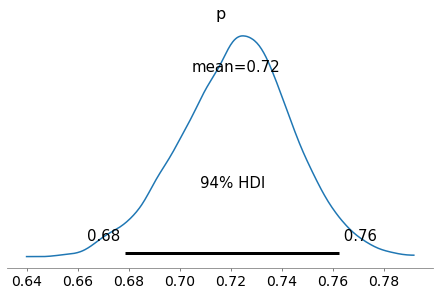

In [157]:
with pm.Model() as bird_model:
    
    p = pm.Uniform('p', 0, 1)
    seen = pm.Binomial('seen', n=counts['yes']+counts['no'], p=p, observed=counts['yes'])
    
    posterior=pm.sample()
    pm.plot_posterior(posterior)